

# Project: Investigate The Movies Database(TMDb) dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The following is an investigation into the TMDb movie data set. The TMDb data set contains 10000 movies from the The Movies Database(TMDb) which includes user ratings and revenue.
>


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
%matplotlib inline
sns.set_style('darkgrid')


<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, the data will be checked for cleanliness, and then trimmed and cleaned for analysis.



>Firstly,I will familiarize myself with the variables of the data set in order to gain insight of what to explore

In [10]:
#read the movies data csv file 
movies_df=pd.read_csv("tmdb-movies.csv")


In [11]:
#get a snapshot of the first five rows in the dataset
movies_df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


>>After familiarizing myself with the dataset,I seek to answer the following questions:
- What is the average movie popularity from year to year
- What is average budget of movies from year to year
- What is the average revenue from year to year
- What is the average profitability of movies from year to year
- What genres are the most popular from year to year
- What genres are the most profitable from year to year
- Which release months are the most profitable from year to year
- Which average runtime is the most profitable rom year to year






>>After coming up with research questions,I will start off by trimming off my dataset before cleaning it.This will allow me to narrow down my cleaning efforts only to columns that I will use in the analysis.
>
>>I begin with inspecting the current frame of the dataframe.This will allow me to check whether trimming of columns was actually successful.


In [12]:
#inspect the frame of the data set
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

>>I have identified the following columns for trimming:'id','imdb_id,'budget','revenue' ,'original_title',homepage','cast','director' ,'tagline','keywords','overview','production_companies','vote_count' and 'vote_average'

In [13]:
#drop columns from the dataset
movies_df.drop(['id','budget','revenue' ,'imdb_id','original_title', 'homepage','cast','director' ,'tagline','keywords','overview','production_companies','vote_count','vote_average'], axis=1, inplace=True)

>Let us check if the columns have been successfully dropped

In [14]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    10866 non-null  float64
 1   runtime       10866 non-null  int64  
 2   genres        10843 non-null  object 
 3   release_date  10866 non-null  object 
 4   release_year  10866 non-null  int64  
 5   budget_adj    10866 non-null  float64
 6   revenue_adj   10866 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 594.4+ KB


>>The columns have been successfully dropped.
>
>>The data will now be checked for cleanliness

>Let's check for missing values

In [15]:
#number of missing values in dataset
movies_df.isnull().sum()

popularity       0
runtime          0
genres          23
release_date     0
release_year     0
budget_adj       0
revenue_adj      0
dtype: int64

>All but one column i.e. 'genre' have no missing values.However for columns of revenue,budget, and runtime rows that contain '0' will be treated as missing values.So let us check if those columns have rows with value of '0'

In [19]:
#check the number of rows with budget of 0
len(movies_df.query('budget_adj==0'))


5696

In [20]:
#check the number of rows with revenue of 0
len(movies_df.query('revenue_adj==0'))

6016

In [22]:
#check the number of rows with runtime of 0
len(movies_df.query('runtime==0'))

31

>It appears over half of the rows have no reported budgets and/revenues
>>

>We will now check for duplicates

In [23]:
#checks for total duplicated rows
sum(movies_df.duplicated())

1

Let us now inspect the data types to understand whether we may need to change to a format that will be easier to work with

In [25]:
#checks for data types of all columns in the data frame
movies_df.dtypes

popularity      float64
runtime           int64
genres           object
release_date     object
release_year      int64
budget_adj      float64
revenue_adj     float64
dtype: object

>let us inspect the release years column to find opportunities to transform the data to values easy to work with since most of our analysis will be done from year to year

In [58]:
movies_df['release_year'].describe()

count    3854.000000
mean     2001.261028
std        11.282575
min      1960.000000
25%      1995.000000
50%      2004.000000
75%      2010.000000
max      2015.000000
Name: release_year, dtype: float64

>>Key observation here:data set starts from the year 1960 to 2015

>>Missing values-The anaylsis will take the following approach:missing values that constitute less or equal to 20% of data set will be replaced with mean where appropriate or a new value;missing values that are over half of the dataset will be dropped
- The 'genre' column has 23 missing values.They will be replaced with a new value i.e. 'unspecified'
- budget and revenue have over half rows with 0.They will be dropped
- runtime has 31 rows with 0.They will be replace with mean
>
>>Duplicates
- there is one duplicated row.It will be dropped
>
>>Datatypes
- release_date will be changed to datetime in order to extract the month value
>
>>Other changes to be implemented
- we assume revenue and budget are in dollars.We will convert these to millions in order to trim the size of the figures
- A new column for release month will be created as the release month is a key factor in answering one of our research questions
- A new column for profit will be created since profit is central to our analysis
- A new column for movie decade will be created.This is because,It would be easier to group release years of movies into decades as opposed to analysing each year individually.Thus,movies will be grouped as such:the 60s,the 70s,the 80s,the 90s,early 2000s and 2010 to present

In [27]:
#drop all rows with no recorded budget 
rows_missing_budget=movies_df.query('budget_adj==0')
movies_df=movies_df.drop(rows_missing_budget.index,axis=0)

In [32]:
#check to see if rows have been successfully dropped
len(movies_df.query('budget_adj==0'))

0

In [30]:
#drop all rows with no recorded revenue
rows_missing_revenue=movies_df.query('revenue_adj==0')
movies_df=movies_df.drop(rows_missing_revenue.index,axis=0)

In [33]:
#check to see if rows have been successfully dropped
len(movies_df.query('revenue_adj==0'))

0

>check to see if runtime still has missing values or they have been dropped during cleaning of budget and revenue


In [31]:
#check the number of rows with runtime of 0
len(movies_df.query('runtime==0'))

0

>runtime rows with 0 have been dropped so there is no need to replace them with mean anymore.
>Let us now replace missing genres with 'unspecified'

In [35]:
#fill missing genres with 'unspecified'
movies_df['genres']=movies_df['genres'].replace(np.nan,'unspecified')

In [36]:
#check to see if filling in of missing values hae been successful
movies_df['genres'].isnull().sum()

0

lets us check if we still have duplicated rows or they have been dropped already

In [37]:
#checks for total duplicated rows
sum(movies_df.duplicated())

1

In [39]:
#drop dulpicated rows
movies_df.drop_duplicates(inplace=True)

In [40]:
#check to see if duplicated rows have been successfully dropped
sum(movies_df.duplicated())

0

In [64]:
#check the new shape of data frame
movies_df.shape

(3854, 9)

>release date will now be changed to datetime datatype in order to extract month and create new release month column

In [46]:
#release_date will be converted to datetime
movies_df['release_date']=pd.to_datetime(movies_df['release_date'],format='%m/%d/%y')


In [47]:
#a new column for release month will be created
movies_df['release_month']=pd.DatetimeIndex(movies_df['release_date']).month

In [48]:
#convert month ints into month name
movies_df['release_month']=movies_df['release_month'].apply(lambda x: calendar.month_abbr[x])

The code above for converting month ints into month name was taken from [this stakeoverflow answer](https://stackoverflow.com/questions/37625334/python-pandas-convert-month-int-to-month-name)

In [49]:
#check to see if changes have been successfull implemented
movies_df.head(3)

,popularity,runtime,genres,release_date,release_year,budget_adj,revenue_adj,release_month
0,32.985763,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1.379999e+08,1.392446e+09,Jun
1,28.419936,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,1.379999e+08,3.481613e+08,May
2,13.112507,119,Adventure|Science Fiction|Thriller,2015-03-18,2015,1.012000e+08,2.716190e+08,Mar


>release_date column will now be dropped since it is no longer relevant to our analysis

In [50]:
#drop the release_date column
movies_df.drop(['release_date'], axis=1, inplace=True)

In [51]:
#check to see if changes implemented
movies_df.head(3)

,popularity,runtime,genres,release_year,budget_adj,revenue_adj,release_month
0,32.985763,124,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,1.392446e+09,Jun
1,28.419936,120,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,3.481613e+08,May
2,13.112507,119,Adventure|Science Fiction|Thriller,2015,1.012000e+08,2.716190e+08,Mar


>revenue and budget columns will be turned to millions in order to trim the long figures

In [52]:
#budget and revenue values will be divided by 1000000 to convert the figures into millions
movies_df['budget_adj']=(movies_df['budget_adj']/1000000).round(2)
movies_df['revenue_adj']=(movies_df['revenue_adj']/1000000).round(2)

In [53]:
#check to see if changes are implemented
movies_df.head(2)

,popularity,runtime,genres,release_year,budget_adj,revenue_adj,release_month
0,32.985763,124,Action|Adventure|Science Fiction|Thriller,2015,138.0,1392.45,Jun
1,28.419936,120,Action|Adventure|Science Fiction|Thriller,2015,138.0,348.16,May


>let us create a new column for profit

In [55]:
#create column for profit
movies_df['profit']=movies_df['revenue_adj']-movies_df['budget_adj']

In [63]:
#inspect the profit column
movies_df['profit'].describe()

count    3854.000000
mean       92.824632
std       194.071335
min      -413.910000
25%        -1.500000
50%        27.370000
75%       107.457500
max      2750.130000
Name: profit, dtype: float64

In [56]:
movies_df.head(2)

,popularity,runtime,genres,release_year,budget_adj,revenue_adj,release_month,profit
0,32.985763,124,Action|Adventure|Science Fiction|Thriller,2015,138.0,1392.45,Jun,1254.45
1,28.419936,120,Action|Adventure|Science Fiction|Thriller,2015,138.0,348.16,May,210.16


>we will now group release years by decades and create a new column with that information

In [59]:
#creation of new column for movie decades
bin_edges=[1959,1969,1979,1989,1999,2009,2015]
bin_names=['60s','70s','80s','90s','Early 2000s','2010~present']
movies_df['movie_decades']=pd.cut(movies_df['release_year'],bin_edges,labels=bin_names)

In [62]:
#inspect if changes are implemented
movies_df.head(2)

,popularity,runtime,genres,release_year,budget_adj,revenue_adj,release_month,profit,movie_decades
0,32.985763,124,Action|Adventure|Science Fiction|Thriller,2015,138.0,1392.45,Jun,1254.45,2010~present
1,28.419936,120,Action|Adventure|Science Fiction|Thriller,2015,138.0,348.16,May,210.16,2010~present


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 :What is the average movie popularity from year to year?


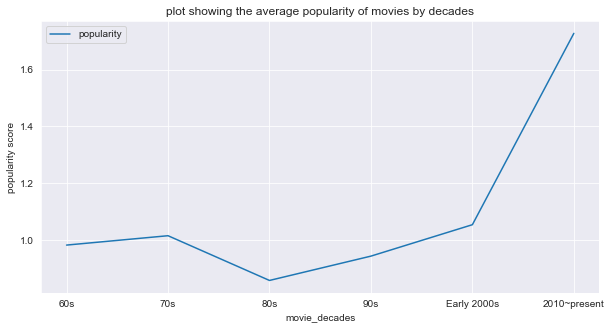

In [66]:
movies_df.groupby('movie_decades')['popularity'].mean().plot(figsize=(10,5),legend=True,title='plot showing the average popularity of movies by decades',ylabel='popularity score');

>>The plot indicates that average popularity in movies has been increasing since the 60s.However,popularity took a huge dip in the 80 before increasing again in the 90s and has been increasing eversince.The 80s were the least popular  decade for movies while 2010 to present is the most popular decade 

### Research Question 2: What is average budget of movies from year to year
###  Research Question3:What is the average revenue from year to year
###    Research question4:What is the average profitability of movies from year to year 

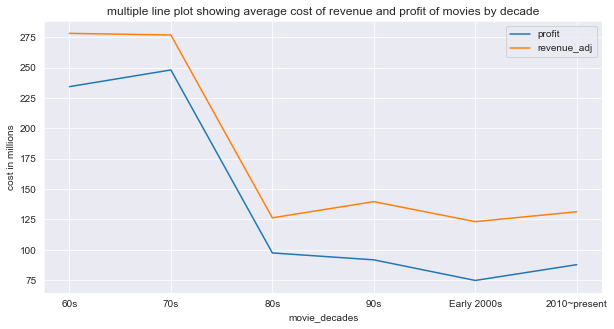

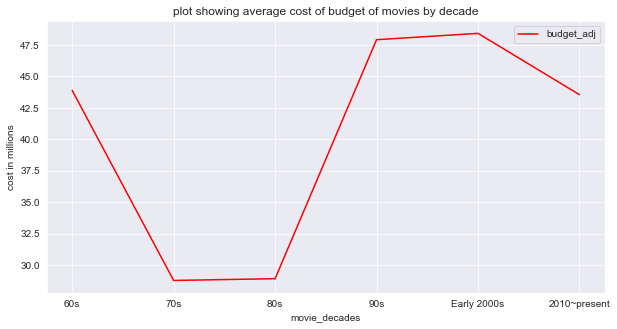

In [75]:

movies_df.groupby('movie_decades')['profit'].mean().plot(figsize=(10,5),legend=True,ylabel='cost in millions',title='multiple line plot showing average cost of revenue and profit of movies by decade');
movies_df.groupby('movie_decades')['revenue_adj'].mean().plot(figsize=(10,5),legend=True,ylabel='cost in millions',title='multiple line plot showing average cost of revenue and profit of movies by decade');
plt.show()
movies_df.groupby('movie_decades')['budget_adj'].mean().plot(figsize=(10,5),legend=True,ylabel='cost in millions',title='plot showing average cost of budget of movies by decade',color='r');

>>Profit
>
>the 70s recorded the highest profits followed by the 60s .The profit took a huge nosedive in the 80s and continued till its lowest in the early 2000s.The 2010 to present decade has seen a slight increase in profits
>>Revenue
>
>the line for revenue is similar to the line for profit.The 60s were the highest for revenue followed by the 70s before falling to drastically in the 80s.The revenue slightly increased in the 90s before falling to its lowest in the early 2000s.The revenue has seen slight increase in since 2010
>>Budget
>
>Average budget was lowest in the 70s followed by the 80s before shooting up in the 90s and its all time high in the early 2000s before slightly dropping in the 2010 to present decade

### Research question 5:  What genres are the most popular from year to year?

>For most popular genres, we will limit to the top four most popular genres.The 75 percentile of the popularity column will be used as benchmark for popularity

In [77]:
#to check the 75 percentile of popularity column
movies_df['popularity'].describe()

count    3854.000000
mean        1.191554
std         1.475162
min         0.001117
25%         0.462367
50%         0.797511
75%         1.368324
max        32.985763
Name: popularity, dtype: float64

In [79]:
# popularity benchmark
popularity_benchmark=1.368 

In [88]:
#this groups the popular genres by movie decade
sixties_popular_movies=movies_df.query( 'popularity>=@popularity_benchmark & movie_decades=="60s" ' )
seventies_popular_movies=movies_df.query('popularity>=@popularity_benchmark & movie_decades=="70s" ')
eighties_popular_movies=movies_df.query('popularity>=@popularity_benchmark & movie_decades=="80s" ')
nineties_popular_movies=movies_df.query( 'popularity>=@popularity_benchmark & movie_decades=="90s" ')
early2000s_popular_movies=movies_df.query('popularity>=@popularity_benchmark & movie_decades=="Early 2000s" ')
present_popular_movies=movies_df.query('popularity>=@popularity_benchmark & movie_decades=="2010~present" ')

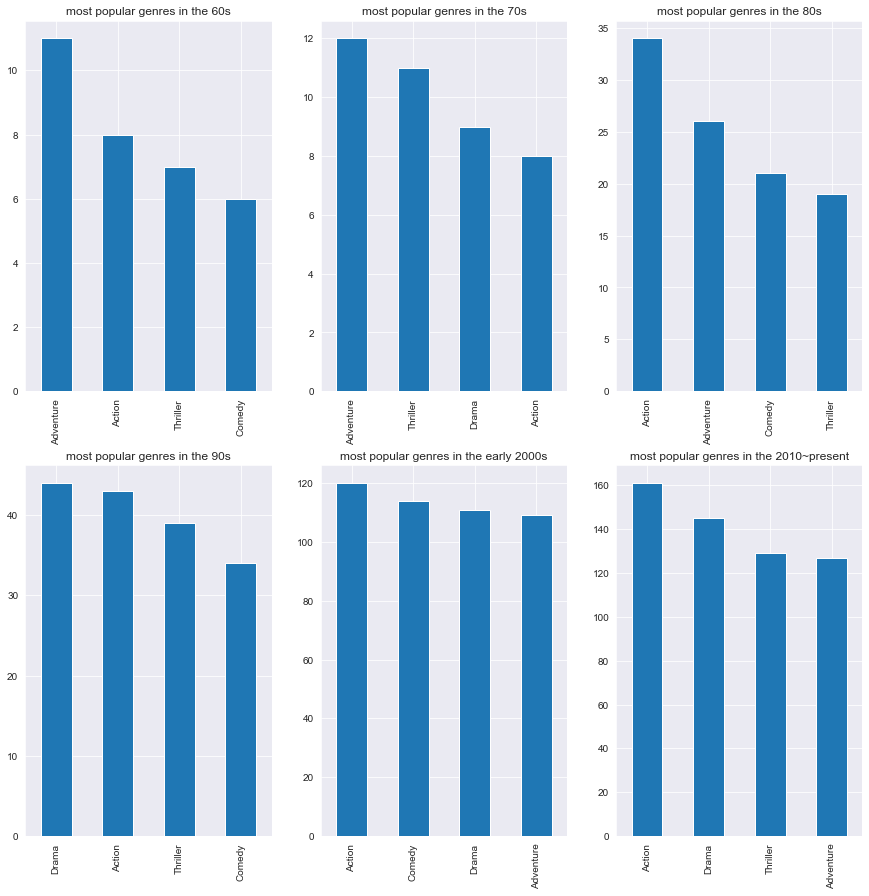

In [89]:

fig,axs=plt.subplots(2,3)#for laying out our plots in our picture frame

#This is for plotting bar graphs for each decade.However most rows have multiple genres seperated by '|' so we first have to split them
sixties_popular_genres=pd.Series(sixties_popular_movies['genres'].str.cat(sep='|').split('|')).value_counts().nlargest(4).plot(kind='bar',ax=axs[0][0],figsize=(15,15),title='most popular genres in the 60s',)
seventies_popular_genres=pd.Series(seventies_popular_movies['genres'].str.cat(sep='|').split('|')).value_counts().nlargest(4).plot(kind='bar',ax=axs[0][1],figsize=(15,15),title='most popular genres in the 70s')
eighties_popular_genres=pd.Series(eighties_popular_movies['genres'].str.cat(sep='|').split('|')).value_counts().nlargest(4).plot(kind='bar',ax=axs[0][2],figsize=(15,15),title='most popular genres in the 80s')
nineties_popular_genres=pd.Series(nineties_popular_movies['genres'].str.cat(sep='|').split('|')).value_counts().nlargest(4).plot(kind='bar',ax=axs[1][0],figsize=(15,15),title='most popular genres in the 90s')
early2000s_popular_genres=pd.Series(early2000s_popular_movies['genres'].str.cat(sep='|').split('|')).value_counts().nlargest(4).plot(kind='bar',ax=axs[1][1],figsize=(15,15),title='most popular genres in the early 2000s')
present_popular_genres=pd.Series(present_popular_movies['genres'].str.cat(sep='|').split('|')).value_counts().nlargest(4).plot(kind='bar',ax=axs[1][2],figsize=(15,15),title='most popular genres in the 2010~present')

>>Our charts indicate that the most popular genres have been consistent over the different decades.The popular genres include adventure,action,thriller,comedy and drama

### Research question 6: What genres are the most profitable from year to year

>We will limit our genres to the top 4

In [90]:
#lets group movie decades by profit first
sixties_profitable_movies=movies_df.query('profit>0 & movie_decades=="60s"')
seventies_profitable_movies=movies_df.query('profit>0 & movie_decades=="70s"')
eighties_profitable_movies=movies_df.query('profit>0 & movie_decades=="80s"')
nineties_profitable_movies=movies_df.query('profit>0 & movie_decades=="90s"')
early2000s_profitable_movies=movies_df.query('profit>0 &  movie_decades=="Early 2000s"')
present_profitable_movies=movies_df.query('profit>0 & movie_decades=="2010~present"')

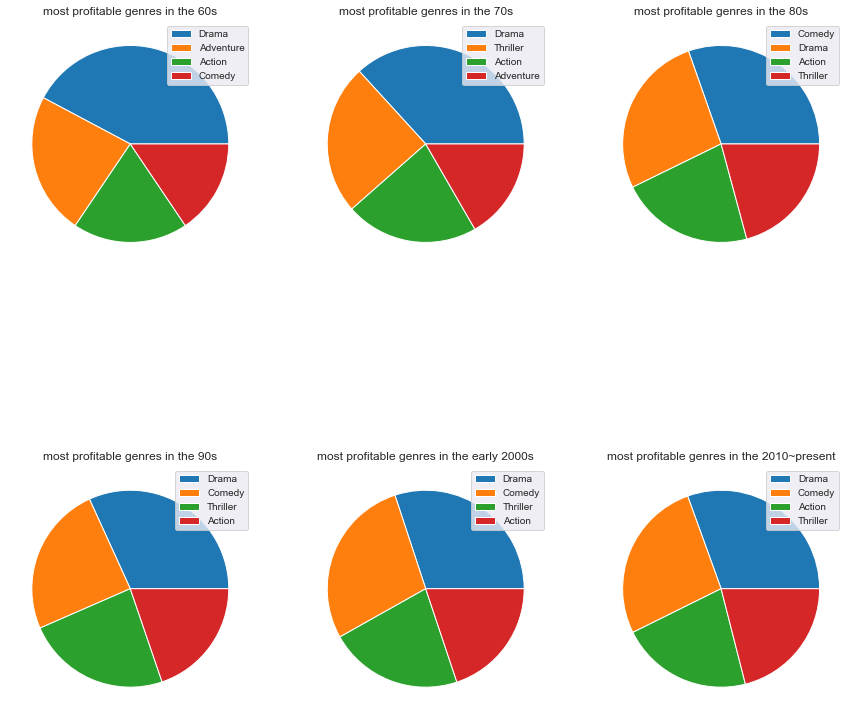

In [100]:
fig,axs=plt.subplots(2,3)#for laying out our charts in one picture

#This is for plotting pie charts graphs for each decade.However most rows have multiple genres seperated by '|' so we first have to split them
sixties_genres=pd.Series(sixties_profitable_movies['genres'].str.cat(sep='|').split('|')).value_counts().nlargest(4).plot(kind='pie',ax=axs[0][0],figsize=(15,15),legend=True,labels=None,title='most profitable genres in the 60s',ylabel='')
seventies_genres=pd.Series(seventies_profitable_movies['genres'].str.cat(sep='|').split('|')).value_counts().nlargest(4).plot(kind='pie',ax=axs[0][1],figsize=(15,15),legend=True,labels=None,title='most profitable genres in the 70s',ylabel='')
eighties_genres=pd.Series(eighties_profitable_movies['genres'].str.cat(sep='|').split('|')).value_counts().nlargest(4).plot(kind='pie',ax=axs[0][2],figsize=(15,15),legend=True,labels=None,title='most profitable genres in the 80s',ylabel='')
nineties_genres=pd.Series(nineties_profitable_movies['genres'].str.cat(sep='|').split('|')).value_counts().nlargest(4).plot(kind='pie',ax=axs[1][0],figsize=(15,15),legend=True,labels=None,title='most profitable genres in the 90s',ylabel='')
early2000s_genres=pd.Series(early2000s_profitable_movies['genres'].str.cat(sep='|').split('|')).value_counts().nlargest(4).plot(kind='pie',ax=axs[1][1],figsize=(15,15),legend=True,labels=None,title='most profitable genres in the early 2000s',ylabel='')
present_genres=pd.Series(present_profitable_movies['genres'].str.cat(sep='|').split('|')).value_counts().nlargest(4).plot(kind='pie',ax=axs[1][2],figsize=(15,15),legend=True,labels=None,title='most profitable genres in the 2010~present',ylabel='')


>The chart indicate that the most profitable genres are similar across the decades i.e. drama,comedy,thriller,action and adventure

### Research question 7: Which release months are the most profitable from year to year

In [104]:
sixties_movies=movies_df.query('movie_decades=="60s"')
seventies_movies=movies_df.query('movie_decades=="70s"')
eighties_movies=movies_df.query('movie_decades=="80s"')
nineties_movies=movies_df.query('movie_decades=="90s"')
early2000s_movies=movies_df.query('movie_decades=="Early 2000s"')
present_decade_movies=movies_df.query('movie_decades=="2010~present"')

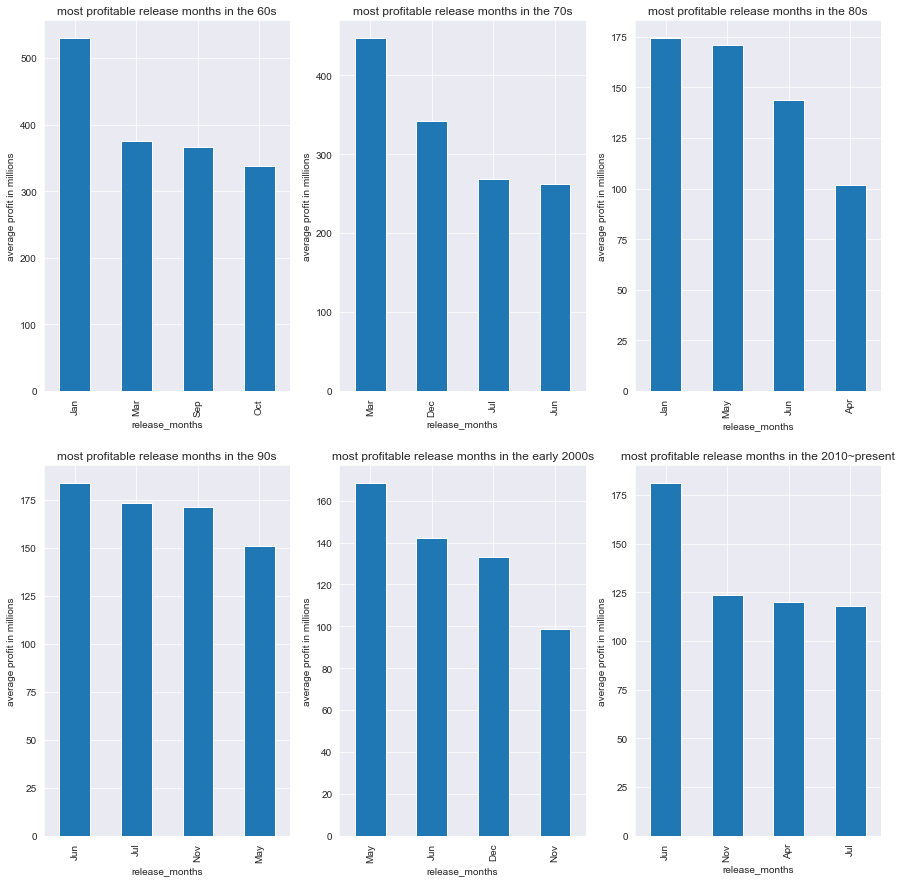

In [109]:
xlabel='release_months'
ylabel='average profit in millions'
fig,axs=plt.subplots(2,3)

sixties_movies.groupby('release_month')['profit'].mean().nlargest(4).plot(ax=axs[0][0],kind='bar',figsize=(15,15),xlabel=xlabel,ylabel=ylabel,title='most profitable release months in the 60s');
seventies_movies.groupby('release_month')['profit'].mean().nlargest(4).plot(ax=axs[0][1],kind='bar',figsize=(15,15),xlabel=xlabel,ylabel=ylabel,title='most profitable release months in the 70s');
eighties_movies.groupby('release_month')['profit'].mean().nlargest(4).plot(ax=axs[0][2],kind='bar',figsize=(15,15),xlabel=xlabel,ylabel=ylabel,title='most profitable release months in the 80s');
nineties_movies.groupby('release_month')['profit'].mean().nlargest(4).plot(ax=axs[1][0],kind='bar',figsize=(15,15),xlabel=xlabel,ylabel=ylabel,title='most profitable release months in the 90s');
early2000s_movies.groupby('release_month')['profit'].mean().nlargest(4).plot(ax=axs[1][1],kind='bar',figsize=(15,15),xlabel=xlabel,ylabel=ylabel,title='most profitable release months in the early 2000s');
present_decade_movies.groupby('release_month')['profit'].mean().nlargest(4).plot(ax=axs[1][2],kind='bar',figsize=(15,15),xlabel=xlabel,ylabel=ylabel,title='most profitable release months in the 2010~present');

The charts show that most profitable months to release movies across the decades are May,June,July,November and December

### Research question 8: Which average runtime is the most profitable rom year to year

>>lets come up with two groups:short runtime and long runtime.These will be split along the median

In [110]:
#calculate the median 
runtime_median=movies_df['runtime'].median()

In [112]:
#split the movies into those with short and long runtime
short_runtime=movies_df.query('runtime<@runtime_median')
long_runtime=movies_df.query('runtime>=@runtime_median')


In [113]:
#for the short_runtime movies group by the decade of the movie and the average of profits
short_runtime.groupby('movie_decades')['profit'].mean()

movie_decades
60s             376.378750
70s             140.375227
80s              66.786773
90s              56.758705
Early 2000s      49.332497
2010~present     62.739291
Name: profit, dtype: float64

In [115]:
##for the long_runtime movies group by the decade of the movie and the average of profits
long_runtime.groupby('movie_decades')['profit'].mean()

movie_decades
60s             216.263968
70s             301.281011
80s             135.896171
90s             124.089898
Early 2000s     103.047583
2010~present    112.945753
Name: profit, dtype: float64

In [121]:
xValues_list=['60s','70s','80s','90s','early 2000s  ','   2010~present']#values for x axis
short_runtime_mean_profit=[376.38,140.38,66.78,56.76,49.33,62.74] #average profits of movies with short runtime by decade
long_runtime_mean_profit=[216.26,301.28,135.90,124.09,103.05,112.95]#average profits of movies with long runtime by decade



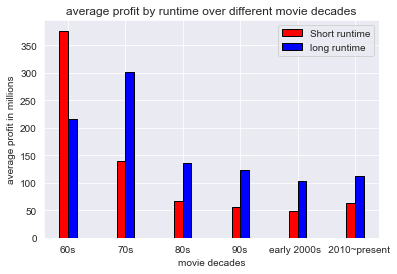

In [123]:
#creating the multiple bar graph for comparing average profits of short and long runtime movies
x_axis=np.arange(len(xValues_list))
width=0.15

plt.bar(x_axis,short_runtime_mean_profit,color='r',width=width,edgecolor='black',label='Short runtime')
plt.bar(x_axis+width,long_runtime_mean_profit,color='b',width=width,edgecolor='black',label='long runtime')

plt.xticks(x_axis+width/2,xValues_list)
plt.xlabel('movie decades')
plt.ylabel('average profit in millions')
plt.title('average profit by runtime over different movie decades')
plt.legend();

>Movies with long runtimes made more average profit except in the 60s decade

<a id='conclusions'></a>
## Conclusions

#### What is the average movie popularity from year to year
> Our analysis indicates that popularity of movies has been drastically increasing since the 80s.Therefore,this is good  time to make movies as appetite is high.
>
#### What is average budget ,revenue and profitability of movies from year to year   
>Key findings show that revenue and profit from movies has gone down particulaly between the 80s to the early 2000s since the 60s and the 70s although popularity of movies has been increasing.Analysis of average budget cost indicate that average budget costs shot up during the same period that revenue went down.It is possible that the increase in production cost affected the profits negatively.
#### What genres are the most popular from year to year
>The most popular genres across the years have continued to include Adventure,Action,Thriller,Comedy and Drama.Therefore,production companies are advised to make more of the abovementioned genres in order to mantain the popularity in movies.
#### What genres are the most profitable from year to year
>The most profitable  genres are the same as as the popular ones i.e Adventure,Action,Thriller,Comedy and Drama.Thus production companies should probably invest more in the mentioned genres to generate profits from movies
#### Which release months are the most profitable from year to year
>The most profitable release months over the decades are May,June,July,November and December.This is likely because May to July are Summer holiday months in the Nothern hemisphere while November and December hosts prominent holiday months and it is during holiday seasons when most people consume movies. Therefore,production companies are advised to aim to release their movies during the holiday months.
#### Which average runtime is the most profitable from year to year
>Our analysis show that movies that are at least around 2 hours tend to do better in terms of profit.

#### Key limitations
- Over half of the rows were dropped due to missing values and this likely affected the results
- The cast,the directors and production companies were not included.These popularity of these may affect popularity and profitability of a movie



